# Exploratory Data Analysis Household Pulse Survey

### 1. Studying the dataset

Public Use Data File (PUF) includes a replicate weight data file, and a data dictionary for every new release of the survey. The shape of the datasets has changed over time, depending on the number of surveyed people and the addition of new variables. 

#### Features
- 17 weeks, from April 23 to October 26
- Surveyed people between 50k-100k per survey
- Variables between 82 to 188
- Demographic variables
- Index variables: SCRAM (ID) and WEEK
- Spending variables
- Food variables
- Shopping variables
- Telework
- Trips
- Health
- Work variables
- Missing data designed as -88 and -99
- Mostly categorical data
- Require use of data dictionary to interpretate the name of columns and categories

Some interesting variables related to the spending of the stimulus payment can be found during weeks 7 to 12 from Phase 1 of the Survey and changes in shopping patterns are part of the new questions incorporated in Phase 2, from week 13 onwards. Although spending and shopping variables are not asked simultaneously to the population, they offer valious insights for our study as the survey tries to be representative along demographic variables. and they are pre-processed separately.

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df1 = pd.read_csv('../data/interim/census/household_shopping1.csv')
df2 = pd.read_csv('../data/interim/census/household_shopping2.csv')
df3 = pd.read_csv('../data/interim/census/household_shopping3.csv')
df4 = pd.read_csv('../data/interim/census/household_shopping4.csv')
df5 = pd.read_csv('../data/interim/census/household_shopping5.csv')

In [3]:
df1.replace({-99: np.nan, -88: np.nan}, inplace=True)
df2.replace({-99: np.nan, -88: np.nan}, inplace=True)
df3.replace({-99: np.nan, -88: np.nan}, inplace=True)
df4.replace({-99: np.nan, -88: np.nan}, inplace=True)
df5.replace({-99: np.nan, -88: np.nan}, inplace=True)

In [4]:
df = pd.concat([df1, df2, df3, df4, df5])
#df_scram drops the duplicates
df_scram = df.drop_duplicates()

In [5]:
print('Original size: {}'.format(df.shape))
print('Size dropping duplicates: {}'.format(df_scram.shape))

Original size: (502692, 44)
Size dropping duplicates: (502692, 44)


### PURPOSE EDA:
Overall expenditures and changes in consumer Behavior Relevant demographics: gender, states, cities, income, children at home, marital status.

### BASIC ANALYSIS: COMPOSITION OF THE SURVEY

### SPENDING VARIABLES
- Plotbar EIP: Use of Economic Impact Payment (Stimulus) and plot EIPSPND (Spending use of Economic Impact Payment). - Percent change of EIPSPND over time split by food and others (weekly and grouping by demographics).
- Plot Difficulty with expenses (EXPNS_DIF)

### SHOPPING VARIABLES
- Plot CHNGHOW1-CHNGHOW12: Spending and shopping change
- Plot Purchases modality
- Cash/credit card
- Resumed/avoided eating at restaurants
- Fewer trips to stores and trips transit.
- Why spending/shopping changed: Barplot reasons split by demographics

Defining useful functions:

In [6]:
def generation_(TBIRTH_YEAR):
# Function to determine generation by birthday year. 
# According to the survey, all persons born before 2002.
    if TBIRTH_YEAR in list(range(1946, 1955)):
        return 'Baby Boomer'
    elif TBIRTH_YEAR in list(range(1955, 1965)):
        return 'Generation Jones'
    elif TBIRTH_YEAR in list(range(1965, 1981)):
        return 'Generation X'
    elif TBIRTH_YEAR in list(range(1981, 1997)):
        return 'Millennials'
    elif TBIRTH_YEAR in list(range(1997, 2010)):
        return 'Generation Z'
    else:
        return 'Silent Generation'

In [7]:
def get_rctable(var1, var2, df):
    res = pd.crosstab(df[var2], df[var1])
    chi2, p, dof, ex = chi2_contingency(res)
    output = round( res.div(res.sum(axis = 1),axis = 0)*100, 2 )
    return output.style.set_caption(f'{var1} vs. {var2}: Chi-square p-value={p:.5f}')

In [8]:
def get_rct(var1, var2, df):
    res = pd.crosstab(df[var2], df[var1])
    output = round( res.div(res.sum(axis = 1),axis = 0)*100, 2 )
    return output

#### Legends by demographic variables

In [9]:
race = ['White', 
              'Black', 
              'Asian',
              'Other']

educ = ['Less than \nhigh school', 
               'Some high \nschool',
               'High school',
               'Some college',
               'Associate',
               'Bachelor',
               'Graduate']

marital = ['Married',
                  'Widowed',
                  'Divorced',
                  'Separated',
                  'Never married']

region = ['Northeast', 
          'South', 
          'Midwest', 
          'West']

diff_expnd = ['Not at all',
              'A little', 
              'Somewhat',
              'Very']

generation = ['Silent \nGeneration',
              'Baby \nBoomer',
              'Generation \nJones',
              'Generation X',
              'Generation Z',
              'Millennials']


msa = { '35620': 'New York-Newark-Jersey City',
        '31080': 'Los Angeles-Long Beach-Anaheim',
        '16980': 'Chicago-Naperville-Elgin',
        '19100': 'Dallas-Fort Worth-Arlington',
        '26420': 'Houston-The Woodlands-Sugar Land',
        '47900': 'Washington-Arlington-Alexandria',
        '33100': 'Miami-Fort Lauderdale-Pompano Beach',
        '37980': 'Philadelphia-Camden-Wilmington',
        '12060': 'Atlanta-Sandy Springs-Alpharetta',
        '38060': 'Phoenix-Mesa-Chandler',
        '14460': 'Boston-Cambridge-Newton',
        '41860': 'San Francisco-Oakland-Berkeley',
        '40140': 'Riverside-San Bernardino-Ontario',
        '19820': 'Detroit-Warren-Dearborn',
        '42660': 'Seattle-Tacoma-Bellevue'}

## COMPOSITION OF THE SURVEY

In [10]:
df.columns

Index(['SCRAM', 'WEEK', 'EST_ST', 'EST_MSA', 'REGION', 'TBIRTH_YEAR',
       'EGENDER', 'RHISPANIC', 'RRACE', 'EEDUC', 'MS', 'THHLD_NUMPER',
       'THHLD_NUMKID', 'THHLD_NUMADLT', 'EXPNS_DIF', 'CHNGHOW1', 'CHNGHOW2',
       'CHNGHOW3', 'CHNGHOW4', 'CHNGHOW5', 'CHNGHOW6', 'CHNGHOW7', 'CHNGHOW8',
       'CHNGHOW9', 'CHNGHOW10', 'CHNGHOW11', 'CHNGHOW12', 'WHYCHNGD1',
       'WHYCHNGD2', 'WHYCHNGD3', 'WHYCHNGD4', 'WHYCHNGD5', 'WHYCHNGD6',
       'WHYCHNGD7', 'WHYCHNGD8', 'WHYCHNGD9', 'WHYCHNGD10', 'WHYCHNGD11',
       'WHYCHNGD12', 'FEWRTRIPS', 'FEWRTRANS', 'PLNDTRIPS', 'CNCLDTRPS',
       'INCOME'],
      dtype='object')

In [11]:
df.groupby('REGION').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
REGION,,,,,,,,,,,,,,,,,,,,,
1.0,0.155624,0.155624,0.155624,0.069858,0.155624,0.155624,0.155624,0.155624,0.155624,0.154084,...,0.003237,0.027072,0.006986,0.046744,0.002053,0.141944,0.142300,0.142425,0.112367,0.119584
2.0,0.315473,0.315473,0.315473,0.111866,0.315473,0.315473,0.315473,0.315473,0.315473,0.312629,...,0.006931,0.049287,0.013477,0.093910,0.005606,0.288704,0.289440,0.289658,0.225530,0.243310
3.0,0.203707,0.203707,0.203707,0.033486,0.203707,0.203707,0.203707,0.203707,0.203707,0.201983,...,0.004681,0.029334,0.008761,0.056997,0.003511,0.187345,0.187791,0.187831,0.145936,0.158865
4.0,0.325195,0.325195,0.325195,0.102415,0.325195,0.325195,0.325195,0.325195,0.325195,0.322333,...,0.006879,0.056446,0.013163,0.104559,0.004551,0.301968,0.302529,0.302718,0.243748,0.259915


In [12]:
df.groupby('EGENDER').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,RHISPANIC,RRACE,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
EGENDER,,,,,,,,,,,,,,,,,,,,,
1.0,0.412453,0.412453,0.412453,0.135230,0.412453,0.412453,0.412453,0.412453,0.412453,0.408602,...,0.010758,0.067501,0.014840,0.119644,0.009477,0.379676,0.380607,0.380758,0.297023,0.323910
2.0,0.587547,0.587547,0.587547,0.182394,0.587547,0.587547,0.587547,0.587547,0.587547,0.582426,...,0.010969,0.094638,0.027548,0.182567,0.006244,0.540285,0.541453,0.541875,0.430558,0.457763


In [13]:
df.groupby('RRACE').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
RRACE,,,,,,,,,,,,,,,,,,,,,
1.0,0.816840,0.816840,0.816840,0.235500,0.816840,0.816840,0.816840,0.816840,0.816840,0.809734,...,0.017836,0.128440,0.032879,0.238176,0.013505,0.756998,0.758532,0.758834,0.605645,0.648202
2.0,0.081251,0.081251,0.081251,0.038423,0.081251,0.081251,0.081251,0.081251,0.081251,0.080322,...,0.001715,0.012755,0.004205,0.027182,0.000824,0.071095,0.071417,0.071597,0.052668,0.056414
3.0,0.051352,0.051352,0.051352,0.028258,0.051352,0.051352,0.051352,0.051352,0.051352,0.050810,...,0.001040,0.012841,0.002522,0.019400,0.000539,0.046159,0.046289,0.046339,0.034954,0.038817
4.0,0.050558,0.050558,0.050558,0.015443,0.050558,0.050558,0.050558,0.050558,0.050558,0.050162,...,0.001136,0.008102,0.002781,0.017454,0.000853,0.045708,0.045821,0.045863,0.034313,0.038240


In [14]:
race_reg = df.groupby(['REGION', 'RRACE']).count()
race_reg = (race_reg/race_reg.groupby(level=[0]).sum())*100
race_reg

SCRAM       WEEK     EST_ST    EST_MSA  TBIRTH_YEAR  \
REGION RRACE                                                            
1.0    1.0    84.495916  84.495916  84.495916  78.158727    84.495916   
       2.0     6.808043   6.808043   6.808043  10.020788     6.808043   
       3.0     5.122010   5.122010   5.122010   8.013213     5.122010   
       4.0     3.574031   3.574031   3.574031   3.807273     3.574031   
2.0    1.0    76.382531  76.382531  76.382531  69.660703    76.382531   
       2.0    15.321655  15.321655  15.321655  19.328164    15.321655   
       3.0     3.902614   3.902614   3.902614   6.750365     3.902614   
       4.0     4.393200   4.393200   4.393200   4.260768     4.393200   
3.0    1.0    88.099842  88.099842  88.099842  77.490643    88.099842   
       2.0     5.757700   5.757700   5.757700  12.944811     5.757700   
       3.0     2.729439   2.729439   2.729439   6.077348     2.729439   
       4.0     3.413019   3.413019   3.413019   3.487198     3.413019   
4.0    1.0    81.462382  81.462382  81.462382  75.209292    81.462382   
       2.0     3.256807   3.256807   3.256807   5.337684     3.256807   
       3.0     7.844109   7.844109   7.844109  12.765379     7.844109   
       4.0     7.436702   7.436702   7.436702   6.687644     7.436702   

                EGENDER  RHISPANIC      EEDUC         MS  THHLD_NUMPER  \
REGION RRACE                                                             
1.0    1.0    84.495916  84.495916  84.495916  84.535936     84.495916   
       2.0     6.808043   6.808043   6.808043   6.786991      6.808043   
       3.0     5.122010   5.122010   5.122010   5.103477      5.122010   
       4.0     3.574031   3.574031   3.574031   3.573596      3.574031   
2.0    1.0    76.382531  76.382531  76.382531  76.407519     76.382531   
       2.0    15.321655  15.321655  15.321655  15.294994     15.321655   
       3.0     3.902614   3.902614   3.902614   3.898038      3.902614   
       4.0     4.393200   4.393200   4.393200   4.399450      4.393200   
3.0    1.0    88.099842  88.099842  88.099842  88.122322     88.099842   
       2.0     5.757700   5.757700   5.757700   5.741862      5.757700   
       3.0     2.729439   2.729439   2.729439   2.720244      2.729439   
       4.0     3.413019   3.413019   3.413019   3.415571      3.413019   
4.0    1.0    81.462382  81.462382  81.462382  81.473024     81.462382   
       2.0     3.256807   3.256807   3.256807   3.241912      3.256807   
       3.0     7.844109   7.844109   7.844109   7.838478      7.844109   
       4.0     7.436702   7.436702   7.436702   7.446585      7.436702   

                ...      WHYCHNGD8  WHYCHNGD9  WHYCHNGD10  WHYCHNGD11  \
REGION RRACE    ...                                                     
1.0    1.0      ...      84.511371  82.423396   81.976082   81.866542   
       2.0      ...       7.621389   6.311999    8.058087    7.694272   
       3.0      ...       4.732637   7.877140    5.922551    6.200528   
       4.0      ...       3.134604   3.387464    4.043280    4.238659   
2.0    1.0      ...      77.066590  73.551017   71.306273   73.097780   
       2.0      ...      14.322618  15.502906   18.523985   17.242840   
       3.0      ...       3.817451   6.562803    4.531365    4.764023   
       4.0      ...       4.793341   4.383274    5.638376    4.895357   
3.0    1.0      ...      88.227794  86.450563   84.741144   86.137093   
       2.0      ...       5.397365   5.567612    7.129882    6.613849   
       3.0      ...       2.932427   4.706361    3.701181    3.497138   
       4.0      ...       3.442414   3.275465    4.427793    3.751920   
4.0    1.0      ...      81.839213  78.865198   76.862627   78.582980   
       2.0      ...       3.238866   3.140088    3.959498    3.464546   
       3.0      ...       7.056102  10.794714    8.916427    9.596469   
       4.0      ...       7.865818   7.200000   10.261448    8.356005   

              WHYCHNGD12  FEWRTRIPS  FEWRTRANS  PLNDTRI

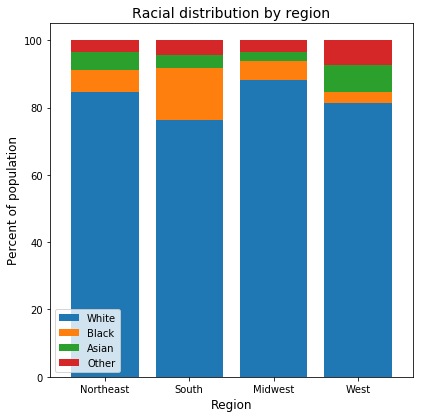

In [15]:
race_reg = df.groupby(['REGION', 'RRACE']).count()
race_reg = (race_reg/race_reg.groupby(level=[0]).sum())*100

test = race_reg.SCRAM.unstack('RRACE').fillna(0)
legend = race

labels = region

fig, ax = plt.subplots(figsize=(6.5, 6.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Racial distribution by region', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percent of population', size=12)

In [16]:
df.groupby('EEDUC').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
EEDUC,,,,,,,,,,,,,,,,,,,,,
1.0,0.006203,0.006203,0.006203,0.002023,0.006203,0.006203,0.006203,0.006203,0.006203,0.006105,...,0.000117,0.000157,0.000251,0.001581,0.000135,0.005120,0.005170,0.005182,0.002413,0.003927
2.0,0.014309,0.014309,0.014309,0.004555,0.014309,0.014309,0.014309,0.014309,0.014309,0.014136,...,0.000243,0.000432,0.000513,0.003843,0.000173,0.011936,0.012019,0.012055,0.005807,0.009246
3.0,0.117418,0.117418,0.117418,0.029621,0.117418,0.117418,0.117418,0.117418,0.117418,0.116204,...,0.002308,0.005783,0.004649,0.031512,0.001689,0.104418,0.104820,0.104873,0.062991,0.084020
4.0,0.215876,0.215876,0.215876,0.060711,0.215876,0.215876,0.215876,0.215876,0.215876,0.213972,...,0.004731,0.022565,0.009272,0.067725,0.003521,0.195865,0.196301,0.196383,0.144717,0.162312
5.0,0.104573,0.104573,0.104573,0.026782,0.104573,0.104573,0.104573,0.104573,0.104573,0.103650,...,0.002505,0.011051,0.004735,0.033134,0.001689,0.096071,0.096302,0.096327,0.073168,0.081167
6.0,0.292899,0.292899,0.292899,0.100320,0.292899,0.292899,0.292899,0.292899,0.292899,0.290484,...,0.006793,0.060331,0.012176,0.089542,0.004838,0.272334,0.272799,0.272992,0.230797,0.235649
7.0,0.248723,0.248723,0.248723,0.093612,0.248723,0.248723,0.248723,0.248723,0.248723,0.246477,...,0.005031,0.061821,0.010792,0.074873,0.003676,0.234217,0.234649,0.234820,0.207688,0.205352


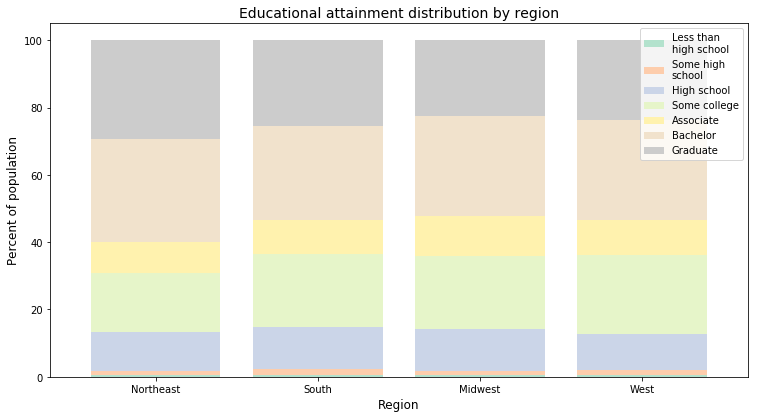

In [17]:
educ_reg = df.groupby(['REGION', 'EEDUC']).count()
educ_reg = (educ_reg/educ_reg.groupby(level=[0]).sum())*100

test = educ_reg.SCRAM.unstack('EEDUC').fillna(0)
legend = educ

labels = region

fig, ax = plt.subplots(figsize=(12.5, 6.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap=plt.cm.get_cmap('Pastel2', 7))
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Educational attainment distribution by region', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percent of population', size=12)

In [18]:
df.groupby('MS').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
MS,,,,,,,,,,,,,,,,,,,,,
1.0,0.572150,0.572150,0.572150,0.176223,0.572150,0.572150,0.572150,0.572150,0.572150,0.572150,...,0.013090,0.099992,0.023509,0.168469,0.010201,0.532521,0.533633,0.533913,0.441998,0.454471
2.0,0.048183,0.048183,0.048183,0.014307,0.048183,0.048183,0.048183,0.048183,0.048183,0.048183,...,0.000702,0.002865,0.001156,0.015071,0.000742,0.044986,0.045169,0.045223,0.030699,0.037922
3.0,0.150396,0.150396,0.150396,0.043977,0.150396,0.150396,0.150396,0.150396,0.150396,0.150396,...,0.003077,0.019167,0.006000,0.051499,0.002095,0.139873,0.140227,0.140285,0.103153,0.120157
4.0,0.018486,0.018486,0.018486,0.006272,0.018486,0.018486,0.018486,0.018486,0.018486,0.018486,...,0.000370,0.002276,0.000830,0.006127,0.000201,0.016575,0.016621,0.016634,0.011391,0.013816
5.0,0.201813,0.201813,0.201813,0.073900,0.201813,0.201813,0.201813,0.201813,0.201813,0.201813,...,0.004416,0.037251,0.010710,0.059496,0.002393,0.181475,0.181843,0.181998,0.136937,0.152045


In [19]:
df.groupby('THHLD_NUMPER').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
THHLD_NUMPER,,,,,,,,,,,,,,,,,,,,,
1.0,0.169935,0.169935,0.169935,0.055266,0.169935,0.169935,0.169935,0.169935,0.169935,0.169935,...,0.003316,0.021439,0.005699,0.051463,0.002220,0.157725,0.158164,0.158312,0.114356,0.138357
2.0,0.373185,0.373185,0.373185,0.111114,0.373185,0.373185,0.373185,0.373185,0.373185,0.373185,...,0.007816,0.054741,0.013611,0.112011,0.006348,0.347004,0.347716,0.347899,0.280593,0.298511
3.0,0.174982,0.174982,0.174982,0.057534,0.174982,0.174982,0.174982,0.174982,0.174982,0.174982,...,0.003911,0.032678,0.008528,0.054373,0.002548,0.159808,0.160184,0.160223,0.127579,0.134969
4.0,0.158473,0.158473,0.158473,0.054371,0.158473,0.158473,0.158473,0.158473,0.158473,0.158473,...,0.003726,0.033398,0.008246,0.047540,0.002411,0.144512,0.144798,0.144896,0.118737,0.120133
5.0,0.073096,0.073096,0.073096,0.023629,0.073096,0.073096,0.073096,0.073096,0.073096,0.073096,...,0.001665,0.012743,0.003680,0.021733,0.001200,0.065845,0.065989,0.066044,0.052251,0.053599
6.0,0.029543,0.029543,0.029543,0.009220,0.029543,0.029543,0.029543,0.029543,0.029543,0.029543,...,0.000702,0.004486,0.001478,0.008711,0.000481,0.026507,0.026583,0.026611,0.020456,0.021405
7.0,0.011172,0.011172,0.011172,0.003555,0.011172,0.011172,0.011172,0.011172,0.011172,0.011172,...,0.000271,0.001508,0.000583,0.003515,0.000207,0.010020,0.010048,0.010060,0.007605,0.008067
8.0,0.004697,0.004697,0.004697,0.001436,0.004697,0.004697,0.004697,0.004697,0.004697,0.004697,...,0.000113,0.000603,0.000243,0.001478,0.000099,0.004265,0.004281,0.004285,0.003127,0.003388
9.0,0.001832,0.001832,0.001832,0.000571,0.001832,0.001832,0.001832,0.001832,0.001832,0.001832,...,0.000038,0.000215,0.000080,0.000573,0.000044,0.001627,0.001635,0.001637,0.001184,0.001267


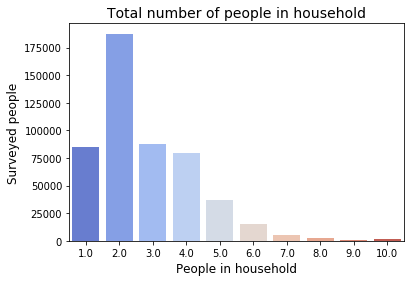

In [20]:
_ = sns.countplot(df.THHLD_NUMPER, palette='coolwarm')
_ = plt.title('Total number of people in household', size=14)
_ = plt.xlabel('People in household', size=12)
_ = plt.ylabel('Surveyed people', size=12)

In [21]:
df.groupby('THHLD_NUMKID').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
THHLD_NUMKID,,,,,,,,,,,,,,,,,,,,,
0.0,0.636221,0.636221,0.636221,0.202450,0.636221,0.636221,0.636221,0.636221,0.636221,0.636221,...,0.013388,0.093300,0.024315,0.193777,0.010187,0.589436,0.590797,0.591147,0.462349,0.509063
1.0,0.159308,0.159308,0.159308,0.051966,0.159308,0.159308,0.159308,0.159308,0.159308,0.159308,...,0.003694,0.029284,0.007804,0.049169,0.002270,0.144854,0.145198,0.145302,0.114692,0.119493
2.0,0.130470,0.130470,0.130470,0.043108,0.130470,0.130470,0.130470,0.130470,0.130470,0.130470,...,0.002910,0.027850,0.006571,0.038467,0.001848,0.119027,0.119266,0.119332,0.098028,0.098915
3.0,0.049488,0.049488,0.049488,0.014160,0.049488,0.049488,0.049488,0.049488,0.049488,0.049488,...,0.001056,0.008460,0.002437,0.014192,0.000816,0.044608,0.044691,0.044735,0.035604,0.036410
4.0,0.016201,0.016201,0.016201,0.004014,0.016201,0.016201,0.016201,0.016201,0.016201,0.016201,...,0.000378,0.002276,0.000760,0.004351,0.000300,0.014595,0.014647,0.014649,0.011442,0.011906
5.0,0.008313,0.008313,0.008313,0.001926,0.008313,0.008313,0.008313,0.008313,0.008313,0.008313,...,0.000300,0.000969,0.000501,0.002256,0.000300,0.007440,0.007460,0.007468,0.005465,0.005886


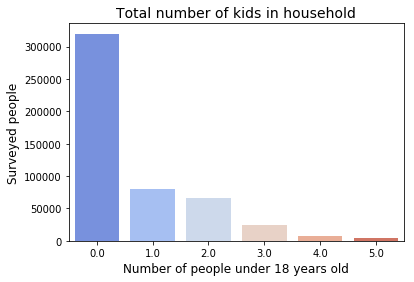

In [22]:
_ = sns.countplot(df.THHLD_NUMKID, palette='coolwarm')
_ = plt.title('Total number of kids in household', size=14)
_ = plt.xlabel('Number of people under 18 years old', size=12)
_ = plt.ylabel('Surveyed people', size=12)

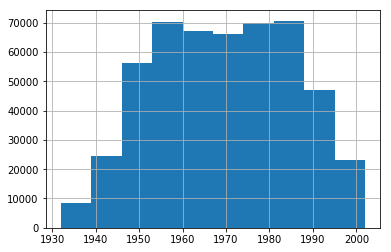

In [23]:
df.TBIRTH_YEAR.hist()

In [24]:
df['GENERATION'] = df.TBIRTH_YEAR.apply(lambda x: generation_(x))

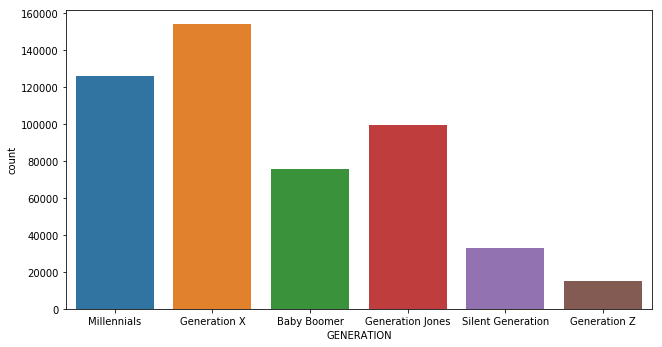

In [25]:
fig, ax = plt.subplots(figsize=(10.5, 5.5))
_ = sns.countplot(df.GENERATION)

In [26]:
df.groupby('GENERATION').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
GENERATION,,,,,,,,,,,,,,,,,,,,,
Baby Boomer,0.150563,0.150563,0.150563,0.043852,0.150563,0.150563,0.150563,0.150563,0.150563,0.150563,...,0.002568,0.010388,0.003225,0.046587,0.002769,0.142250,0.142622,0.142736,0.110274,0.122264
Generation Jones,0.197600,0.197600,0.197600,0.061169,0.197600,0.197600,0.197600,0.197600,0.197600,0.197600,...,0.004452,0.027484,0.007955,0.064857,0.003398,0.184415,0.184906,0.185006,0.144786,0.159175
Generation X,0.306432,0.306432,0.306432,0.102761,0.306432,0.306432,0.306432,0.306432,0.306432,0.306432,...,0.007092,0.060773,0.014502,0.095669,0.004516,0.282189,0.282728,0.282891,0.231058,0.241211
Generation Z,0.029579,0.029579,0.029579,0.008649,0.029579,0.029579,0.029579,0.029579,0.029579,0.029579,...,0.000738,0.003981,0.001912,0.005904,0.000448,0.023468,0.023517,0.023541,0.016330,0.016346
Millennials,0.250095,0.250095,0.250095,0.080600,0.250095,0.250095,0.250095,0.250095,0.250095,0.250095,...,0.005904,0.056910,0.013971,0.070874,0.003187,0.226041,0.226383,0.226506,0.184065,0.191783
Silent Generation,0.065730,0.065730,0.065730,0.020593,0.065730,0.065730,0.065730,0.065730,0.065730,0.065730,...,0.000973,0.002604,0.000824,0.018319,0.001404,0.061598,0.061903,0.061952,0.041067,0.050894


### In summary:

- Region: 32.5% of the surveyed people belong to the West Region, followed by 31.5% who live in the South; 20.3% in the Midwest, and 15.5% in the Northeast.
- Gender: 58.8% of the surveyed people are identified as women (binary options only).
- Race: 81.6% identify themselves as white; 8.1% as black; 5.1% as Asian and 5% other race or race in combination.
- Educational attainment: 29.2% of the surveyed people have a Bachelor’s degree across the country, followed by 24.8% who have completed a Graduate’s degree and 21.6% an incomplete college degree. Only 2% have less than a high school or an incomplete high school.
- Generation: 60% of the surveyed people belong to Generation X and Z, 25% to Millennials, 19.8% to Generation Jones, 15% to Baby Boomers, and 6.5% to Silent Generation.

## Difficulty with expenditures

In [27]:
df.EXPNS_DIF.unique()

array([  1.,   3.,   4.,   2.,  nan])

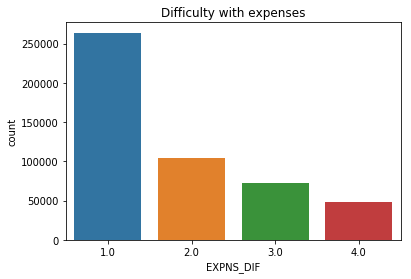

In [28]:
_ = sns.countplot(data=df, x='EXPNS_DIF')
_ = plt.title('Difficulty with expenses')

In [29]:
pd.crosstab(df.WEEK, df.EXPNS_DIF).apply(lambda r: r/r.sum(), axis=1)

EXPNS_DIF,1.0,2.0,3.0,4.0
WEEK,,,,
13.0,0.534653,0.216813,0.149628,0.098907
14.0,0.536206,0.214764,0.149054,0.099976
15.0,0.538613,0.213319,0.149344,0.098723
16.0,0.544011,0.211942,0.145644,0.098403
17.0,0.540166,0.209747,0.148257,0.101830


In [30]:
pd.crosstab(df.REGION, df.EXPNS_DIF).apply(lambda r: r/r.sum(), axis=1)

EXPNS_DIF,1.0,2.0,3.0,4.0
REGION,,,,
1.0,0.544488,0.218820,0.145298,0.091394
2.0,0.520950,0.211967,0.153591,0.113492
3.0,0.558303,0.211447,0.140554,0.089695
4.0,0.540314,0.213725,0.149908,0.096054


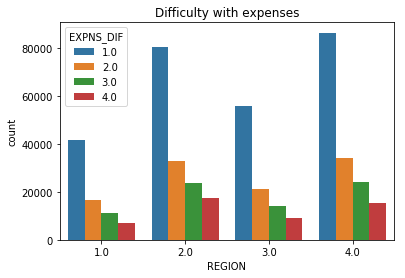

In [31]:
_ = sns.countplot(data=df, x='REGION', hue='EXPNS_DIF')
_ = plt.title('Difficulty with expenses')

In [32]:
expns_reg = df.groupby(['REGION', 'EXPNS_DIF']).count()
expns_reg = expns_reg/expns_reg.groupby(level=[0]).sum()*100

In [33]:
expns_reg.iloc[:, 1]

REGION  EXPNS_DIF
1.0     1.0          54.448810
        2.0          21.882022
        3.0          14.529757
        4.0           9.139411
2.0     1.0          52.095040
        2.0          21.196684
        3.0          15.359090
        4.0          11.349186
3.0     1.0          55.830321
        2.0          21.144739
        3.0          14.055445
        4.0           8.969494
4.0     1.0          54.031355
        2.0          21.372469
        3.0          14.990769
        4.0           9.605407
Name: WEEK, dtype: float64

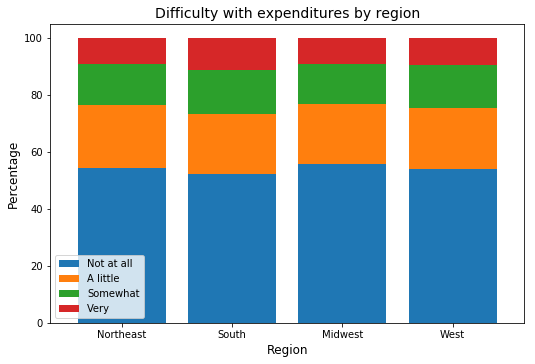

In [34]:
test = expns_reg.SCRAM.unstack('EXPNS_DIF').fillna(0)
legend = diff_expnd
labels = region

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(4), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Difficulty with expenditures by region', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percentage', size=12)

In [35]:
expns_reg_race = df.groupby(['REGION', 'RRACE', 'EXPNS_DIF']).count()
expns_reg_race = expns_reg_race/expns_reg_race.groupby(level=[0]).sum()*100

In [36]:
expns_race_reg = expns_reg_race/expns_reg_race.groupby(level=[1]).sum()*100

In [37]:
expns_race_reg.iloc[:, 1]

REGION  RRACE  EXPNS_DIF
1.0     1.0    1.0          14.613469
               2.0           5.488481
               3.0           3.463925
               4.0           2.003530
        2.0    1.0           6.703666
               2.0           5.492211
               3.0           5.042732
               4.0           4.640341
        3.0    1.0          14.481505
               2.0           5.962174
               3.0           3.730598
               4.0           1.892431
        4.0    1.0           6.321309
               2.0           4.607532
               3.0           4.200159
               4.0           3.806833
2.0     1.0    1.0          13.045315
               2.0           4.780752
               3.0           3.167404
               4.0           2.148129
        2.0    1.0          16.694178
               2.0          11.437001
               3.0          11.088633
               4.0          10.066756
        3.0    1.0          11.003033
               2.0       

In [38]:
expns_reg_race.iloc[:, 1]

REGION  RRACE  EXPNS_DIF
1.0     1.0    1.0          48.402739
               2.0          18.178951
               3.0          11.473213
               4.0           6.636092
        2.0    1.0           2.057846
               2.0           1.685962
               3.0           1.547984
               4.0           1.424460
        3.0    1.0           2.805556
               2.0           1.155074
               3.0           0.722743
               4.0           0.366628
        4.0    1.0           1.182670
               2.0           0.862035
               3.0           0.785818
               4.0           0.712230
2.0     1.0    1.0          43.208700
               2.0          15.834808
               3.0          10.491079
               4.0           7.115034
        2.0    1.0           5.124665
               2.0           3.510853
               3.0           3.403913
               4.0           3.090224
        3.0    1.0           2.131659
               2.0       

In [39]:
expns_race_reg.head()

SCRAM       WEEK     EST_ST    EST_MSA  \
REGION RRACE EXPNS_DIF                                               
1.0    1.0   1.0        14.613469  14.613469  14.613469  15.090477   
             2.0         5.488481   5.488481   5.488481   5.541437   
             3.0         3.463925   3.463925   3.463925   3.409816   
             4.0         2.003530   2.003530   2.003530   1.964435   
       2.0   1.0         6.703666   6.703666   6.703666   6.493141   

                        TBIRTH_YEAR    EGENDER  RHISPANIC      EEDUC  \
REGION RRACE EXPNS_DIF                                                 
1.0    1.0   1.0          14.613469  14.613469  14.613469  14.613469   
             2.0           5.488481   5.488481   5.488481   5.488481   
             3.0           3.463925   3.463925   3.463925   3.463925   
             4.0           2.003530   2.003530   2.003530   2.003530   
       2.0   1.0           6.703666   6.703666   6.703666   6.703666   

                               MS  THHLD_NUMPER     ...      WHYCHNGD9  \
REGION RRACE EXPNS_DIF                              ...                  
1.0    1.0   1.0        14.619360     14.613469     ...      15.279744   
             2.0         5.485600      5.488481     ...       6.121971   
             3.0         3.464296      3.463925     ...       3.010618   
             4.0         2.003756      2.003530     ...       1.245457   
       2.0   1.0         6.698017      6.703666     ...       7.739625   

                        WHYCHNGD10  WHYCHNGD11  WHYCHNGD12  FEWRTRIPS  \
REGION RRACE EXPNS_DIF                                                  
1.0    1.0   1.0         12.570814   10.049625   18.527623  14.725996   
             2.0          7.352569    7.254286    3.755978   5.408826   
             3.0          4.114907    5.164113    2.074197   3.425337   
             4.0          1.998669    3.139258    1.037098   1.998676   
       2.0   1.0          5.895043    4.786441   12.848690   6.816775   

                        FEWRTRANS  PLNDTRIPS  CNCLDTRPS     INCOME  GENERATION  
REGION RRACE EXPNS_DIF                                                          
1.0    1.0   1.0        14.726597  14.726899  15.232926  14.873184   14.613469  
             2.0         5.409306   5.406130   5.353918   5.278014    5.488481  
             3.0         3.426483   3.428411   3.219938   3.379637    3.463925  
             4.0         1.999238   1.999591   1.760401   2.009111    2.003530  
       2.0   1.0         6.808263   6.824031   7.020909   7.144888    6.703666  

[5 rows x 42 columns]

In [40]:
expns_reg_race.reset_index().head()

,REGION,RRACE,EXPNS_DIF,SCRAM,WEEK,EST_ST,EST_MSA,TBIRTH_YEAR,EGENDER,RHISPANIC,...,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME,GENERATION
0,1.0,1.0,1.0,48.402739,48.402739,48.402739,45.477181,48.402739,48.402739,48.402739,...,49.098801,39.589860,32.130072,64.174757,49.017102,49.007634,48.998699,51.265228,49.883419,48.402739
1,1.0,1.0,2.0,18.178951,18.178951,18.178951,16.699865,18.178951,18.178951,18.178951,...,19.671890,23.155796,23.192976,13.009709,18.003875,18.001261,17.987041,18.018194,17.702019,18.178951
2,1.0,1.0,3.0,11.473213,11.473213,11.473213,10.275939,11.473213,11.473213,11.473213,...,9.674097,12.959271,16.510399,7.184466,11.401612,11.402759,11.406860,10.836451,11.335021,11.473213
3,1.0,1.0,4.0,6.636092,6.636092,6.636092,5.920089,6.636092,6.636092,6.636092,...,4.002060,6.294503,10.036652,3.592233,6.652812,6.653127,6.652952,5.924494,6.738392,6.636092
4,1.0,2.0,1.0,2.057846,2.057846,2.057846,3.058176,2.057846,2.057846,2.057846,...,2.361510,2.221589,1.674906,2.524272,2.021961,2.023951,2.031991,1.957690,1.986876,2.057846


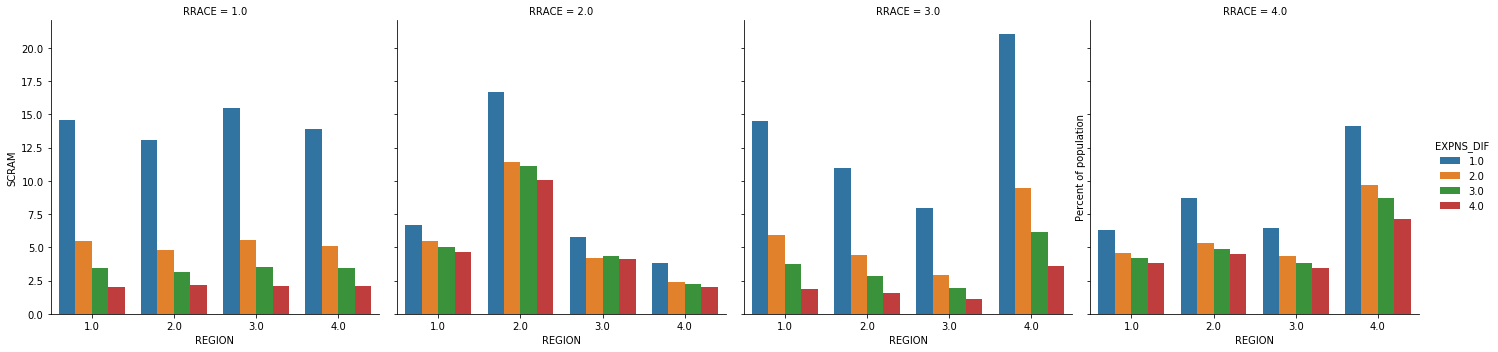

In [41]:
_ = sns.catplot(data=expns_race_reg.reset_index(), x='REGION', hue='EXPNS_DIF', y='SCRAM', col='RRACE', kind='bar')
_ = plt.ylabel('Percent of population')

In [42]:
expns_generation = df.groupby(['GENERATION', 'EXPNS_DIF']).count()
expns_generation = expns_generation/expns_generation.groupby(level=[0]).sum()*100

In [43]:
expns_generation.head()

SCRAM       WEEK     EST_ST    EST_MSA  \
GENERATION       EXPNS_DIF                                               
Baby Boomer      1.0        65.575008  65.575008  65.575008  63.937848   
                 2.0        18.818313  18.818313  18.818313  18.970315   
                 3.0        11.277780  11.277780  11.277780  12.050093   
                 4.0         4.328899   4.328899   4.328899   5.041744   
Generation Jones 1.0        55.736640  55.736640  55.736640  54.770412   

                               REGION  TBIRTH_YEAR    EGENDER  RHISPANIC  \
GENERATION       EXPNS_DIF                                                 
Baby Boomer      1.0        65.575008    65.575008  65.575008  65.575008   
                 2.0        18.818313    18.818313  18.818313  18.818313   
                 3.0        11.277780    11.277780  11.277780  11.277780   
                 4.0         4.328899     4.328899   4.328899   4.328899   
Generation Jones 1.0        55.736640    55.736640  55.736640  55.736640   

                                RRACE      EEDUC    ...      WHYCHNGD8  \
GENERATION       EXPNS_DIF                          ...                  
Baby Boomer      1.0        65.575008  65.575008    ...      71.627907   
                 2.0        18.818313  18.818313    ...      19.147287   
                 3.0        11.277780  11.277780    ...       7.131783   
                 4.0         4.328899   4.328899    ...       2.093023   
Generation Jones 1.0        55.736640  55.736640    ...      69.856887   

                            WHYCHNGD9  WHYCHNGD10  WHYCHNGD11  WHYCHNGD12  \
GENERATION       EXPNS_DIF                                                  
Baby Boomer      1.0        61.889251   54.472548   46.667807   75.360231   
                 2.0        22.839624   26.773597   27.696980   14.337176   
                 3.0        12.013796   13.880321   18.367696    7.420749   
                 4.0         3.257329    4.873535    7.267516    2.881844   
Generation Jones 1.0        60.502680   50.187735   37.672790   69.871043   

                            FEWRTRIPS  FEWRTRANS  PLNDTRIPS  CNCLDTRPS  \
GENERATION       EXPNS_DIF                                               
Baby Boomer      1.0        65.998487  65.961579  65.951862  68.000506   
                 2.0        18.643189  18.651764  18.639359  18.016765   
                 3.0        11.130722  11.156130  11.168817  10.335296   
                 4.0         4.227601   4.230527   4.239962   3.647433   
Generation Jones 1.0        56.120067  56.081948  56.085739  58.332760   

                               INCOME  
GENERATION       EXPNS_DIF             
Baby Boomer      1.0        66.528757  
                 2.0        18.322936  
                 3.0        10.934471  
                 4.0         4.213835  
Generation Jones 1.0        56.708797  

[5 rows x 43 columns]

## CHANGES IN SHOPPING BEHAVIORS


### 1. PURCHASES

In [44]:
x = df.loc[:, ['CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3']].idxmax(axis=1)
df['PURCHASE'] = x

In [45]:
demographics = df.columns[0:14]

In [46]:
df_purchase = df.loc[:, list(demographics) + ['PURCHASE','GENERATION']]
df_purchase_valid = df_purchase.dropna(subset=['PURCHASE'])
df_purchase_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302677 entries, 1 to 99301
Data columns (total 16 columns):
SCRAM            302677 non-null object
WEEK             302677 non-null float64
EST_ST           302677 non-null float64
EST_MSA          101913 non-null float64
REGION           302677 non-null float64
TBIRTH_YEAR      302677 non-null float64
EGENDER          302677 non-null float64
RHISPANIC        302677 non-null float64
RRACE            302677 non-null float64
EEDUC            302677 non-null float64
MS               301324 non-null float64
THHLD_NUMPER     302677 non-null float64
THHLD_NUMKID     302677 non-null float64
THHLD_NUMADLT    302677 non-null float64
PURCHASE         302677 non-null object
GENERATION       302677 non-null object
dtypes: float64(13), object(3)
memory usage: 39.3+ MB


In [47]:
get_rctable('PURCHASE', 'WEEK', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
WEEK,,,
13.0,84.44,7.18,8.38
14.0,84.27,6.98,8.74
15.0,84.2,6.97,8.83
16.0,84.59,6.8,8.61
17.0,85.37,6.6,8.03


#### Cumulative percentage of change in purchase modality across the weeks 13th and 17th of the Household Survey

The contingency table below shows the percentage of surveyed people who declare do more purchases using one of the specified modalities during the pandemic: made more purchases online, as opposed to in store, more purchases by curbside pick-up and more purchases in-store. All of them mutually excluyent since the surveyed person can select only one of them. 

In the graph below, we see the cumulative percentage of change over time to explore the trends over the three modalities. In a nationwide, online purchases are highly prefered and they increase across the weeks as alternative to in-store and curbside purchases, which were decreasing over time. 

In [48]:
temp = get_rct('PURCHASE', 'WEEK', df_purchase_valid).pct_change().cumsum().reset_index()
temp 

PURCHASE,WEEK,CHNGHOW1,CHNGHOW2,CHNGHOW3
0,13.0,NaN,NaN,NaN
1,14.0,-0.002013,-0.027855,0.042959
2,15.0,-0.002844,-0.029288,0.053257
3,16.0,0.001788,-0.053678,0.028342
4,17.0,0.011009,-0.083090,-0.039022


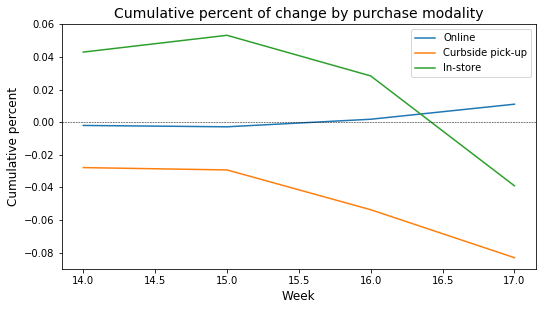

In [49]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y='CHNGHOW1', x='WEEK', data=temp, label='Online')
_ = sns.lineplot(y='CHNGHOW2', x='WEEK', data=temp, label='Curbside pick-up')
_ = sns.lineplot(y='CHNGHOW3', x='WEEK', data=temp, label='In-store')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change by purchase modality', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [50]:
get_rctable('PURCHASE', 'REGION', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
REGION,,,
1.0,86.59,4.88,8.53
2.0,83.06,7.8,9.14
3.0,83.57,7.86,8.57
4.0,85.56,6.51,7.93


In [51]:
get_rctable('PURCHASE', 'RRACE', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
RRACE,,,
1.0,85.33,6.81,7.86
2.0,77.66,8.57,13.77
3.0,86.07,5.29,8.64
4.0,80.99,7.98,11.03


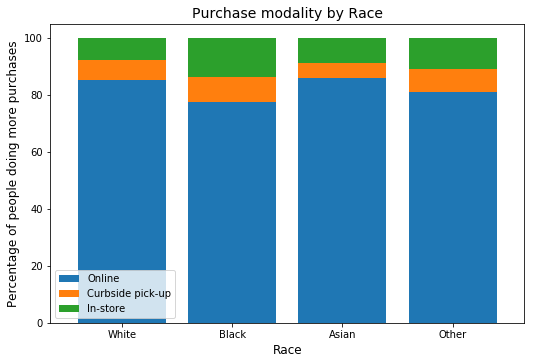

In [52]:
purchase_reg = df_purchase_valid.groupby(['RRACE', 'PURCHASE']).count()
purchase_reg = purchase_reg/purchase_reg.groupby(level=[0]).sum()*100

test = purchase_reg .SCRAM.unstack('PURCHASE').fillna(0)
legend = ['Online', 'Curbside pick-up', 'In-store']
labels = race

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Purchase modality by Race', size=14)
_ = plt.xlabel('Race', size=12)
_ = plt.ylabel('Percentage of people doing more purchases', size=12)

In [53]:
get_rctable('PURCHASE', 'EEDUC', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
EEDUC,,,
1.0,60.4,11.65,27.96
2.0,65.96,11.42,22.61
3.0,73.89,9.73,16.38
4.0,81.35,8.37,10.28
5.0,82.29,7.7,10.01
6.0,87.09,6.23,6.68
7.0,89.51,5.17,5.33


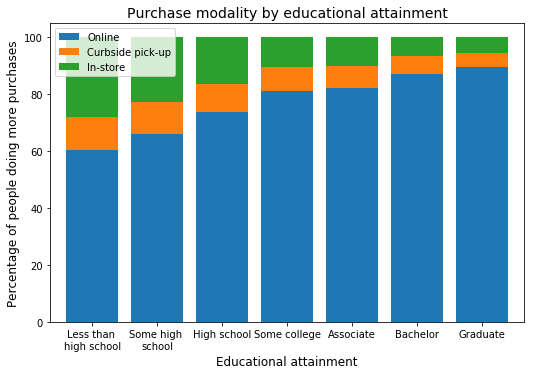

In [54]:
purchase_reg = df_purchase_valid.groupby(['EEDUC', 'PURCHASE']).count()
purchase_reg = purchase_reg/purchase_reg.groupby(level=[0]).sum()*100

test = purchase_reg .SCRAM.unstack('PURCHASE').fillna(0)
legend = ['Online', 'Curbside pick-up', 'In-store']
labels = educ

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Purchase modality by educational attainment', size=14)
_ = plt.xlabel('Educational attainment', size=12)
_ = plt.ylabel('Percentage of people doing more purchases', size=12)

In [55]:
get_rctable('PURCHASE', 'GENERATION', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
GENERATION,,,
Baby Boomer,82.42,6.09,11.48
Generation Jones,83.39,6.19,10.42
Generation X,85.95,6.36,7.69
Generation Z,81.34,10.49,8.16
Millennials,86.61,7.87,5.52
Silent Generation,77.67,8.17,14.16


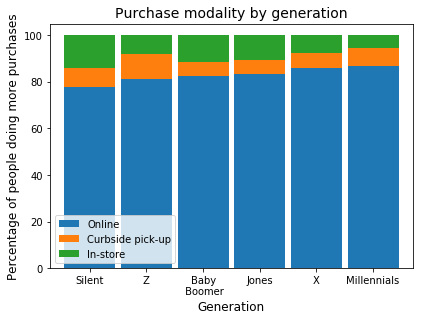

In [56]:
purchase_gen = df_purchase_valid.groupby(['GENERATION', 'PURCHASE']).count()
purchase_gen = purchase_gen/purchase_gen.groupby(level=[0]).sum()*100

test = purchase_gen.SCRAM.unstack('PURCHASE').fillna(0).sort_values('CHNGHOW1')
legend = ['Online', 'Curbside pick-up', 'In-store']
labels = ['Silent', 'Z', 'Baby\n Boomer', 'Jones', 'X', 'Millennials']

fig, ax = plt.subplots(figsize=(6.5, 4.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.9)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Purchase modality by generation', size=14)
_ = plt.xlabel('Generation', size=12)
_ = plt.ylabel('Percentage of people doing more purchases', size=12)

In [57]:
get_rctable('PURCHASE', 'EST_MSA', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
EST_MSA,,,
12060.0,85.5,5.77,8.73
14460.0,88.62,4.09,7.3
16980.0,85.63,6.19,8.19
19100.0,82.75,8.19,9.07
19820.0,82.21,7.25,10.54
26420.0,81.31,8.77,9.92
31080.0,87.88,4.97,7.16
33100.0,84.7,5.42,9.88
35620.0,86.48,4.26,9.26


In [58]:
pd.DataFrame(list(msa.items()), columns=['EST_MSA', 'MSA']) 

,EST_MSA,MSA
0,35620,New York-Newark-Jersey City
1,31080,Los Angeles-Long Beach-Anaheim
2,16980,Chicago-Naperville-Elgin
3,19100,Dallas-Fort Worth-Arlington
4,26420,Houston-The Woodlands-Sugar Land
5,47900,Washington-Arlington-Alexandria
6,33100,Miami-Fort Lauderdale-Pompano Beach
7,37980,Philadelphia-Camden-Wilmington
8,12060,Atlanta-Sandy Springs-Alpharetta
9,38060,Phoenix-Mesa-Chandler


In [59]:
df_msa = pd.DataFrame(list(msa.items()), columns=['EST_MSA', 'MSA']) 
df_msa['EST_MSA'] = df_msa['EST_MSA'].apply(lambda x: float(x))
df_msa['MSA'] = df_msa['MSA'].apply(lambda x: str(x))

In [60]:
temp = get_rct('PURCHASE', 'EST_MSA', df_purchase_valid)
temp = temp.reset_index().reset_index()
temp = temp.merge(df_msa, right_on='EST_MSA', left_on='EST_MSA')

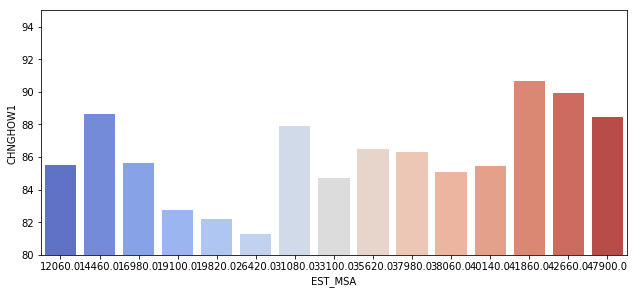

In [61]:
fig, ax = plt.subplots(figsize=(10.5, 4.5))
_ = sns.barplot(x='EST_MSA', y='CHNGHOW1', data=temp, palette='coolwarm')
_ = plt.ylim(80, 95) 

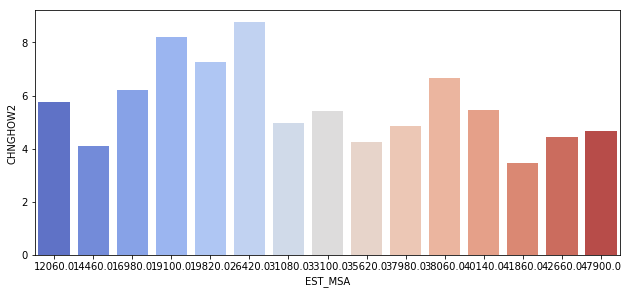

In [62]:
fig, ax = plt.subplots(figsize=(10.5, 4.5))
_ = sns.barplot(x='EST_MSA', y='CHNGHOW2', data=temp, palette='coolwarm')

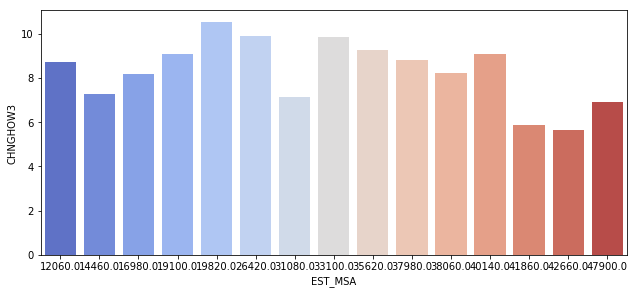

In [63]:
fig, ax = plt.subplots(figsize=(10.5, 4.5))
_ = sns.barplot(x='EST_MSA', y='CHNGHOW3', data=temp, palette='coolwarm')

In [64]:
temp1 = pd.melt(temp, id_vars='EST_MSA', value_vars=['CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3'])

In [65]:
temp1.head()

,EST_MSA,variable,value
0,12060.0,CHNGHOW1,85.50
1,14460.0,CHNGHOW1,88.62
2,16980.0,CHNGHOW1,85.63
3,19100.0,CHNGHOW1,82.75
4,19820.0,CHNGHOW1,82.21


## 2. PAYMENT

`CHNGHOW4` is refering to increase the use of credit cards or smartphone apps for purchases, `CHNGHOW5` is refering to increase the use of cash instead using credit cards or smartphones apps to purchases. 

In [66]:
x = df.loc[:, ['CHNGHOW4', 'CHNGHOW5']].idxmax(axis=1)
df['PAYMENT'] = x

df_payment = df.loc[:, list(demographics) + ['PAYMENT','GENERATION']]
df_payment_valid = df_payment.dropna(subset=['PAYMENT'])
df_payment_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193588 entries, 3 to 99300
Data columns (total 16 columns):
SCRAM            193588 non-null object
WEEK             193588 non-null float64
EST_ST           193588 non-null float64
EST_MSA          66475 non-null float64
REGION           193588 non-null float64
TBIRTH_YEAR      193588 non-null float64
EGENDER          193588 non-null float64
RHISPANIC        193588 non-null float64
RRACE            193588 non-null float64
EEDUC            193588 non-null float64
MS               192727 non-null float64
THHLD_NUMPER     193588 non-null float64
THHLD_NUMKID     193588 non-null float64
THHLD_NUMADLT    193588 non-null float64
PAYMENT          193588 non-null object
GENERATION       193588 non-null object
dtypes: float64(13), object(3)
memory usage: 25.1+ MB


In [67]:
get_rctable('PAYMENT', 'WEEK', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
WEEK,,
13.0,92.28,7.72
14.0,92.25,7.75
15.0,92.3,7.7
16.0,92.76,7.24
17.0,92.72,7.28


In [68]:
temp = get_rct('PAYMENT', 'WEEK', df_payment_valid).pct_change().cumsum().reset_index()
temp 

PAYMENT,WEEK,CHNGHOW4,CHNGHOW5
0,13.0,NaN,NaN
1,14.0,-0.000325,0.003886
2,15.0,0.000217,-0.002566
3,16.0,0.005201,-0.062306
4,17.0,0.004769,-0.056781


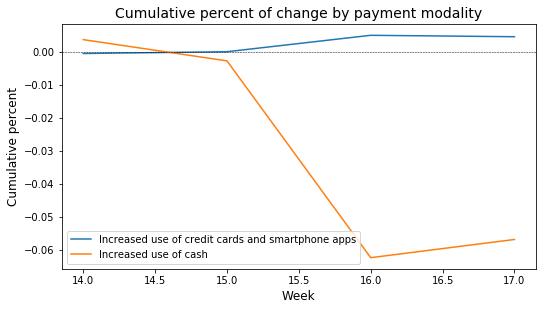

In [69]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y='CHNGHOW4', x='WEEK', data=temp, label='Increased use of credit cards and smartphone apps')
_ = sns.lineplot(y='CHNGHOW5', x='WEEK', data=temp, label='Increased use of cash')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change by payment modality', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [70]:
get_rctable('PAYMENT', 'REGION', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
REGION,,
1.0,93.15,6.85
2.0,91.79,8.21
3.0,92.46,7.54
4.0,92.7,7.3


In [71]:
get_rctable('PAYMENT', 'RRACE', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
RRACE,,
1.0,93.03,6.97
2.0,86.99,13.01
3.0,95.33,4.67
4.0,89.44,10.56


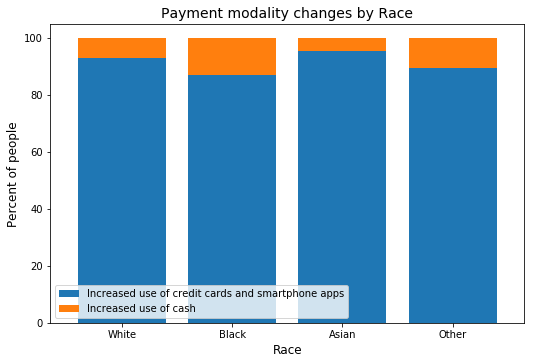

In [72]:
payment_educ = df_payment_valid.groupby(['RRACE', 'PAYMENT']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('PAYMENT').fillna(0)
legend = ['Increased use of credit cards and smartphone apps', 'Increased use of cash']
labels = race

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Payment modality changes by Race', size=14)
_ = plt.xlabel('Race', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [73]:
get_rctable('PAYMENT', 'EEDUC', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
EEDUC,,
1.0,74.32,25.68
2.0,80,20
3.0,86.23,13.77
4.0,90.56,9.44
5.0,90.18,9.82
6.0,94.39,5.61
7.0,95.6,4.4


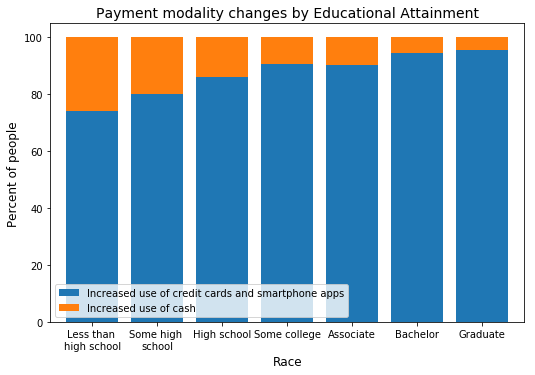

In [74]:
payment_educ = df_payment_valid.groupby(['EEDUC', 'PAYMENT']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('PAYMENT').fillna(0)
legend = ['Increased use of credit cards and smartphone apps', 'Increased use of cash']
labels = educ

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Payment modality changes by Educational Attainment', size=14)
_ = plt.xlabel('Race', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [75]:
get_rctable('PAYMENT', 'GENERATION', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
GENERATION,,
Baby Boomer,90.23,9.77
Generation Jones,89,11
Generation X,92.85,7.15
Generation Z,95.63,4.37
Millennials,95.52,4.48
Silent Generation,90.28,9.72


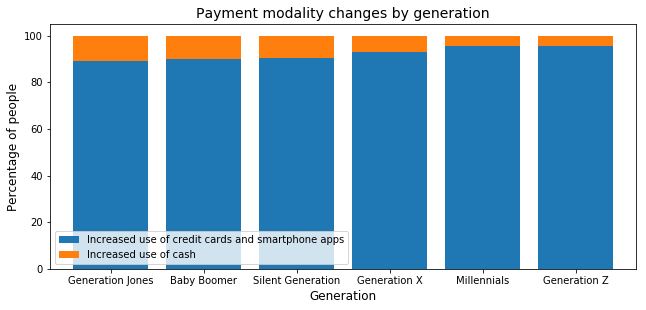

In [76]:
purchase_gen = df_payment_valid.groupby(['GENERATION', 'PAYMENT']).count()
purchase_gen = purchase_gen/purchase_gen.groupby(level=[0]).sum()*100

test = purchase_gen.SCRAM.unstack('PAYMENT').fillna(0).sort_values('CHNGHOW4')
legend = ['Increased use of credit cards and smartphone apps', 'Increased use of cash']
labels = list(test.index)

fig, ax = plt.subplots(figsize=(10.5, 4.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Payment modality changes by generation', size=14)
_ = plt.xlabel('Generation', size=12)
_ = plt.ylabel('Percentage of people', size=12)

In [77]:
get_rctable('PAYMENT', 'EST_MSA', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
EST_MSA,,
12060.0,92.47,7.53
14460.0,94.69,5.31
16980.0,94.09,5.91
19100.0,92.13,7.87
19820.0,91.75,8.25
26420.0,92.5,7.5
31080.0,93.75,6.25
33100.0,92.44,7.56
35620.0,93.01,6.99


## Restaurants

In [78]:
x = df.loc[:, ['CHNGHOW6', 'CHNGHOW7']].idxmax(axis=1)
df['RESTAURANTS'] = x

df_restaurant = df.loc[:, list(demographics) + ['RESTAURANTS','GENERATION']]
df_restaurant_valid = df_restaurant.dropna(subset=['RESTAURANTS'])
df_restaurant_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316549 entries, 1 to 99301
Data columns (total 16 columns):
SCRAM            316549 non-null object
WEEK             316549 non-null float64
EST_ST           316549 non-null float64
EST_MSA          105582 non-null float64
REGION           316549 non-null float64
TBIRTH_YEAR      316549 non-null float64
EGENDER          316549 non-null float64
RHISPANIC        316549 non-null float64
RRACE            316549 non-null float64
EEDUC            316549 non-null float64
MS               315048 non-null float64
THHLD_NUMPER     316549 non-null float64
THHLD_NUMKID     316549 non-null float64
THHLD_NUMADLT    316549 non-null float64
RESTAURANTS      316549 non-null object
GENERATION       316549 non-null object
dtypes: float64(13), object(3)
memory usage: 41.1+ MB


In [79]:
get_rctable('RESTAURANTS', 'WEEK', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
WEEK,,
13.0,86.48,13.52
14.0,85.56,14.44
15.0,85.42,14.58
16.0,85.5,14.5
17.0,86.35,13.65


In [80]:
temp = get_rct('RESTAURANTS', 'WEEK', df_restaurant_valid).pct_change().cumsum().reset_index()
temp 

RESTAURANTS,WEEK,CHNGHOW6,CHNGHOW7
0,13.0,NaN,NaN
1,14.0,-0.010638,0.068047
2,15.0,-0.012275,0.077743
3,16.0,-0.011338,0.072256
4,17.0,-0.001397,0.013635


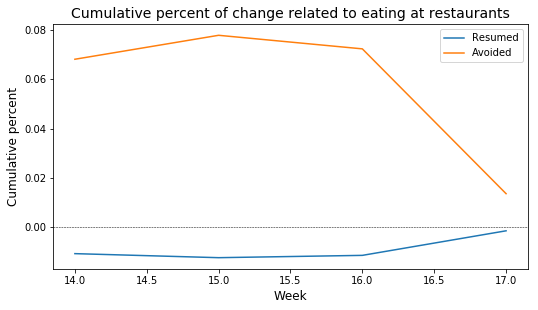

In [81]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y='CHNGHOW6', x='WEEK', data=temp, label='Resumed')
_ = sns.lineplot(y='CHNGHOW7', x='WEEK', data=temp, label='Avoided')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change related to eating at restaurants', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [82]:
get_rctable('RESTAURANTS', 'REGION', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
REGION,,
1.0,85.19,14.81
2.0,85.43,14.57
3.0,85.09,14.91
4.0,87.06,12.94


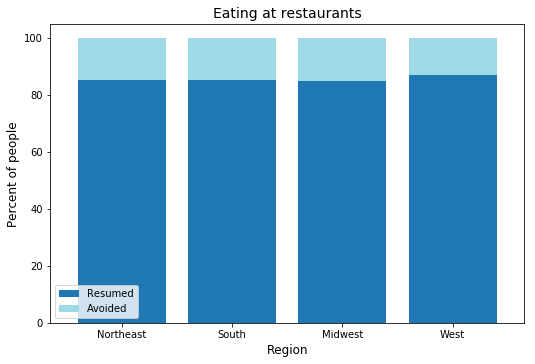

In [83]:
payment_educ = df_restaurant_valid.groupby(['REGION', 'RESTAURANTS']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Resumed', 'Avoided']
labels = region

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Eating at restaurants', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [84]:
get_rctable('RESTAURANTS', 'RRACE', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
RRACE,,
1.0,84.57,15.43
2.0,92.56,7.44
3.0,91.67,8.33
4.0,89.27,10.73


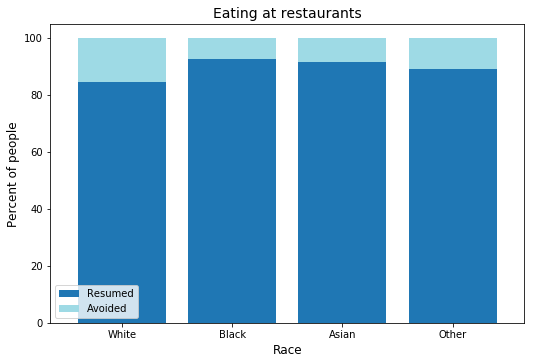

In [85]:
payment_educ = df_restaurant_valid.groupby(['RRACE', 'RESTAURANTS']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Resumed', 'Avoided']
labels = race

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Eating at restaurants', size=14)
_ = plt.xlabel('Race', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [86]:
get_rctable('RESTAURANTS', 'EEDUC', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
EEDUC,,
1.0,93.03,6.97
2.0,93.17,6.83
3.0,87.8,12.2
4.0,85.6,14.4
5.0,84.79,15.21
6.0,84.23,15.77
7.0,87.14,12.86


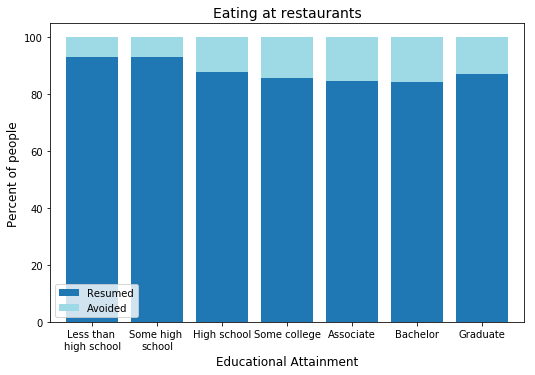

In [87]:
payment_educ = df_restaurant_valid.groupby(['EEDUC', 'RESTAURANTS']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Resumed', 'Avoided']
labels = educ

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Eating at restaurants', size=14)
_ = plt.xlabel('Educational Attainment', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [88]:
get_rctable('RESTAURANTS', 'GENERATION', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
GENERATION,,
Baby Boomer,86.78,13.22
Generation Jones,86.08,13.92
Generation X,85.34,14.66
Generation Z,82.48,17.52
Millennials,85.98,14.02
Silent Generation,86.45,13.55


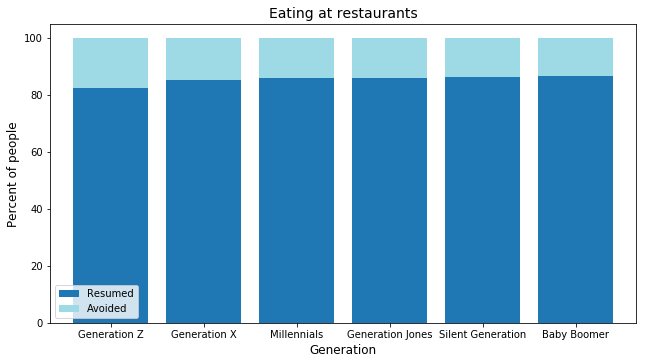

In [89]:
restaurant_gen = df_restaurant_valid.groupby(['GENERATION', 'RESTAURANTS']).count()
restaurant_gen = restaurant_gen/restaurant_gen.groupby(level=[0]).sum()*100

test = restaurant_gen.SCRAM.unstack('RESTAURANTS').fillna(0).sort_values('CHNGHOW6')
legend = ['Resumed', 'Avoided']
labels = list(test.index)

fig, ax = plt.subplots(figsize=(10.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Eating at restaurants', size=14)
_ = plt.xlabel('Generation', size=12)
_ = plt.ylabel('Percent of people', size=12)